In [1]:
import pandas as pd
import numpy as np


In [3]:
glass=pd.read_csv('glass (1).csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
glass["Type"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
## Distribution of the data. Need to normalize the data
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [12]:
# Normalized data frame (considering the numerical part of data) normalizing all rows : 0-9 columns
glass_n = norm_func(glass.iloc[:, 0:9])
glass_n

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [13]:
X = np.array(glass_n.iloc[:,:]) # Predictors. Taken from normalized dataset
Y = np.array(glass['Type']) # Target. Taken from original dataset

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)    #30% spilt test

from sklearn.neighbors import KNeighborsClassifier

In [15]:
## fitting the data then predicting the data. n start with odd numbers
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train, Y_train)

KNeighborsClassifier()

In [20]:
##predicting model1 (train)
pred1 = model1.predict(X_train)
pred1

array([3, 2, 2, 1, 2, 6, 2, 5, 6, 1, 7, 2, 2, 1, 3, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 6, 2, 1, 2, 1, 1, 7, 6, 2, 2, 1, 2, 1, 7, 3, 2, 1, 1, 6,
       2, 1, 5, 1, 2, 1, 7, 1, 1, 1, 2, 2, 2, 1, 2, 7, 2, 2, 1, 1, 1, 7,
       2, 5, 2, 2, 1, 1, 1, 7, 2, 5, 2, 7, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       5, 1, 2, 2, 1, 5, 1, 2, 1, 6, 2, 1, 1, 2, 2, 2, 7, 6, 1, 7, 1, 2,
       1, 5, 2, 1, 2, 2, 2, 1, 2, 2, 1, 7, 7, 2, 1, 2, 2, 6, 1, 2, 5, 7,
       2, 2, 1, 7, 1, 2, 7, 1, 7, 2, 1, 1, 2, 1, 2, 7, 1], dtype=int64)

In [24]:
##Finding the accuracy of the model1 on training data
train_accuracy = np.mean(model1.predict(X_train)==Y_train)
train_accuracy


0.7785234899328859

Train accuracy for model1 is at 77.85%

In [25]:
##predicting model1 (test)
pred1 = model1.predict(X_test)
pred1

array([3, 1, 7, 2, 2, 2, 1, 2, 7, 1, 1, 6, 1, 2, 1, 1, 2, 1, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 7, 7, 1, 7, 1,
       1, 1, 2, 7, 7, 1, 2, 7, 2, 5, 1, 5, 1, 1, 1, 1, 7, 2, 5, 1, 2],
      dtype=int64)

In [28]:
##Accuracy on model1 test data
test_accuracy = np.mean(model1.predict(X_test)==Y_test)
test_accuracy

0.676923076923077

Test accuracy for model1 is at 67.69%

In [30]:
##Changing the K value
model2 = KNeighborsClassifier(n_neighbors=13)
model2.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=13)

In [31]:
##predicting model2 (train)
pred2 = model2.predict(X_train)
pred2

array([1, 2, 2, 1, 1, 7, 2, 5, 2, 1, 7, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 2, 6, 2, 1, 2, 1, 1, 7, 1, 2, 1, 1, 2, 1, 7, 2, 2, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 7, 1, 2, 1, 2, 2, 1, 1, 1, 7, 2, 2, 1, 1, 1, 7,
       2, 2, 2, 2, 1, 1, 1, 7, 2, 5, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       5, 1, 2, 2, 1, 5, 2, 2, 1, 1, 5, 2, 1, 1, 2, 2, 7, 2, 1, 7, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 7, 7, 2, 2, 2, 2, 6, 1, 2, 7, 7,
       2, 2, 1, 7, 1, 1, 7, 1, 7, 2, 1, 1, 2, 1, 1, 7, 1], dtype=int64)

In [32]:
##Finding the accuracy of the model2 on training data
train_accuracy = np.mean(model2.predict(X_train)==Y_train)
train_accuracy


0.6577181208053692

Train accuracy for model2 is at 65.77%

In [33]:
##predicting model2 (test)
pred2 = model2.predict(X_test)
pred2

array([1, 1, 7, 2, 2, 2, 1, 1, 7, 1, 1, 7, 1, 2, 2, 1, 2, 1, 1, 1, 1, 7,
       1, 1, 1, 1, 1, 7, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 7, 7, 1, 7, 1,
       2, 1, 2, 7, 7, 1, 2, 7, 2, 7, 2, 2, 1, 1, 1, 1, 7, 2, 2, 1, 2],
      dtype=int64)

In [34]:
##Accuracy on model2 test data
test_accuracy = np.mean(model2.predict(X_test)==Y_test)
test_accuracy

0.6615384615384615

Test accuracy for model2 is at 66.15%

In [35]:
# creating empty list variable to store accuracy values
acc = []

In [38]:
# running KNN algorithm for 3 to 50 nearest neighbours(odd numbers) and 
# storing the accuracy values 
for i in range (4,30,1):
    model1 = KNeighborsClassifier(n_neighbors = i)
    model1.fit(X_train,Y_train)
    train_acc = np.mean(model1.predict(X_train)==Y_train)
    test_acc = np.mean(model1.predict(X_test)==Y_test)
    acc.append([train_acc, test_acc])

In [48]:
acc

[[0.7248322147651006, 0.7076923076923077],
 [0.7785234899328859, 0.676923076923077],
 [0.7248322147651006, 0.6461538461538462],
 [0.6845637583892618, 0.6615384615384615],
 [0.6577181208053692, 0.6615384615384615],
 [0.6442953020134228, 0.6461538461538462],
 [0.6375838926174496, 0.676923076923077],
 [0.6510067114093959, 0.6615384615384615],
 [0.6644295302013423, 0.6461538461538462],
 [0.6577181208053692, 0.6615384615384615],
 [0.6711409395973155, 0.6307692307692307],
 [0.6845637583892618, 0.6615384615384615],
 [0.6845637583892618, 0.6615384615384615],
 [0.6778523489932886, 0.6923076923076923],
 [0.6375838926174496, 0.6615384615384615],
 [0.6442953020134228, 0.676923076923077],
 [0.6308724832214765, 0.6615384615384615],
 [0.6442953020134228, 0.6923076923076923],
 [0.6510067114093959, 0.6923076923076923],
 [0.6442953020134228, 0.6923076923076923],
 [0.6577181208053692, 0.676923076923077],
 [0.6375838926174496, 0.6615384615384615],
 [0.6308724832214765, 0.6461538461538462],
 [0.62416107382

In [49]:
import matplotlib.pyplot as plt

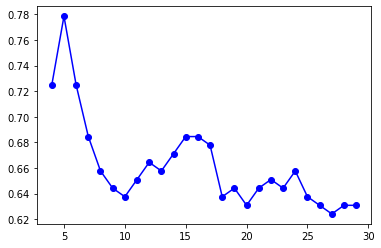

In [50]:
##Training accuracy plot
plt.plot(np.arange(4,30,1),[i[0] for i in acc],'bo-')

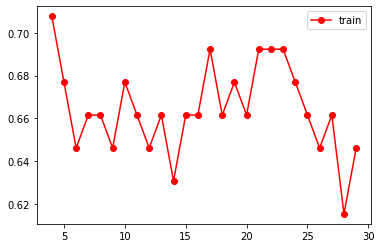

In [61]:
##Test accuracy plot

plt.plot(np.arange(4,30,1),[i[1] for i in acc],'ro-')

plt.legend(["train","test"])

In [53]:
model3 = KNeighborsClassifier(n_neighbors = 6)
model3.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [54]:
pred_train = model3.predict(X_train)
pred_train

array([3, 2, 2, 1, 1, 7, 2, 5, 6, 1, 7, 2, 2, 1, 3, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 6, 2, 1, 2, 1, 1, 7, 6, 2, 2, 1, 2, 1, 7, 2, 2, 1, 1, 6,
       1, 1, 2, 1, 2, 1, 7, 3, 1, 1, 2, 2, 2, 1, 1, 7, 2, 5, 1, 1, 1, 7,
       2, 5, 2, 2, 1, 1, 1, 7, 2, 5, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1,
       5, 1, 2, 2, 1, 5, 1, 2, 1, 6, 5, 1, 1, 1, 2, 2, 7, 6, 1, 7, 1, 2,
       1, 5, 2, 1, 2, 2, 1, 1, 2, 2, 1, 7, 7, 2, 1, 2, 2, 6, 1, 2, 5, 7,
       2, 2, 1, 7, 1, 1, 7, 1, 7, 2, 1, 1, 2, 1, 1, 7, 1], dtype=int64)

In [56]:
cross_tab = pd.crosstab(Y_train,pred_train)
cross_tab

col_0,1,2,3,5,6,7
row_0,,,,,,
1,42,2,0,0,0,0
2,14,39,1,2,0,0
3,6,4,2,0,0,0
5,0,3,0,5,0,1
6,0,0,0,1,5,1
7,1,2,0,1,2,15


In [57]:
train_accuracy = np.mean(pred_train == Y_train)
train_accuracy

0.7248322147651006

Train accuracy for model3 is 72.48%

In [58]:
pred_test = model3.predict(X_test)
pred_test

array([3, 1, 7, 1, 1, 2, 1, 1, 7, 1, 1, 6, 1, 2, 1, 1, 5, 1, 1, 2, 1, 5,
       1, 1, 1, 1, 1, 7, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 7, 7, 1, 7, 1,
       1, 1, 2, 7, 7, 1, 2, 7, 2, 7, 1, 5, 1, 1, 1, 1, 7, 2, 5, 1, 2],
      dtype=int64)

In [59]:
cross_tab_test = pd.crosstab(Y_test,pred_test)
cross_tab_test

col_0,1,2,3,5,6,7
row_0,,,,,,
1,23,2,1,0,0,0
2,9,9,0,2,0,0
3,5,0,0,0,0,0
5,0,0,0,1,0,3
6,0,0,0,1,1,0
7,0,0,0,0,0,8


In [60]:
test_accuracy=np.mean(pred_test ==Y_test)
test_accuracy

0.6461538461538462

Test accuracy for model3 is 64.61%

# Therefore, the best model for glass classification is model1 by using n=5 with 77.85% accuracy in the training data 